# Comparison of different clustering algorithms

In [119]:
import numpy as np
import matplotlib.pyplot as plt
from clustertools.load_data import load_spiral_data, load_aggregation_data, load_birch1_data, load_birch3_data, load_compound_data, load_flame_data, load_pathbased_data, load_sets_data, scale_data, load_fuzzy_data
from timeit import default_timer as timer 
from clustertools.models.distance import KMeans, Regspace
from clustertools.models.similarity import SpectralClustering,AffinityPropagation
from clustertools.models.density import MeanShift, plot_kde, DBSCAN
from clustertools.models.fuzzy import FuzzyCMeans
import pandas as pd
import seaborn as sns
%matplotlib inline


In [29]:
#set font sizes for matplotlib plots and seaborn plots
fontsizeset = 20
rc={'axes.labelsize': fontsizeset, 'font.size': fontsizeset, 'legend.fontsize': fontsizeset, 'axes.titlesize': fontsizeset,'xtick.labelsize': fontsizeset, 'ytick.labelsize': fontsizeset}
sns.mpl.rcParams.update(rc)

In [30]:
#load fuzzy dataset and pre-process
fuzzy = load_fuzzy_data(scale = 'True')
fuzzy = fuzzy[np.arange(0,2309,2),:]

### Clustering on different data sets

Comment: Ich würde sagen, dass wir tabellen und grafiken (siehe unten) einfach vorbereiten und abspeichern für präsentation und paper, das währrend der präsentation auszurechnen dauert einfach zu lange. 

In [31]:
def format_subplots():
    plt.figure(figsize=(30,8))
    fig,[ax1,ax2,ax3,ax4,ax5] = plt.subplots(nrows=1,ncols=5,figsize=(30,6))
    #ax6 = plt.subplot2grid((2,5), (1,0), colspan=6)
    ax = [ax1,ax2, ax3, ax4, ax5]
    #row_labels=[ 'Computing time [s]', 'iter = # of iterations',  'k = # of clusters', 'Mean cluster-center distance']
    #column_labels=['Spiral','Aggregation','Compound', 'Fuzzy', 'Pathbased']
    return fig,ax, row_labels, column_labels

In [32]:
def format_table_data(dataset,estimatecluster, saveas = 'images/tabledataset.png'):
    fig,ax, row_labels, column_labels = format_subplots()
    #row_labels = ['       n = # of datapoints', 'd = dimension', 'estimated # of clusters']
    #datasetresults = np.zeros((3,np.shape(dataset)[0]))
    for i in range(np.shape(dataset)[0]):
        data = dataset[i]
    #    datasetresults[ 0,i] = int(np.size(data,0))
    #    datasetresults[ 1,i] = int(np.size(data,1))
        ax[i].scatter(data[:,0],data[:,1],alpha=.3)
        ax[i].axis('off')
    #datasetresults[2,:] = estimatecluster

    #df = pd.DataFrame(datasetresults[:,:],row_labels , column_labels)
    # ax6 = sns.heatmap(df,vmin=0, vmax=100000, annot=True,cbar = False, fmt="g", linewidths=1, cmap="GnBu",annot_kws={"size": fontsizeset})
    plt.title('Data sets', fontsize=fontsizeset)
    #plt.show()
    plt.savefig(saveas)
    #binary, Blues, BuGn might be other good colormaps to use for table
    

In [33]:
spiral=load_spiral_data(scale = 'True')
aggr=load_aggregation_data(scale = 'True')
compound = load_compound_data(scale = 'True')
fuzzy = load_fuzzy_data(scale = 'True')
fuzzy = fuzzy[np.arange(0,2309,2),:]
pathbased = load_pathbased_data(scale = 'True')
dataset = [spiral, aggr, compound, fuzzy, pathbased]

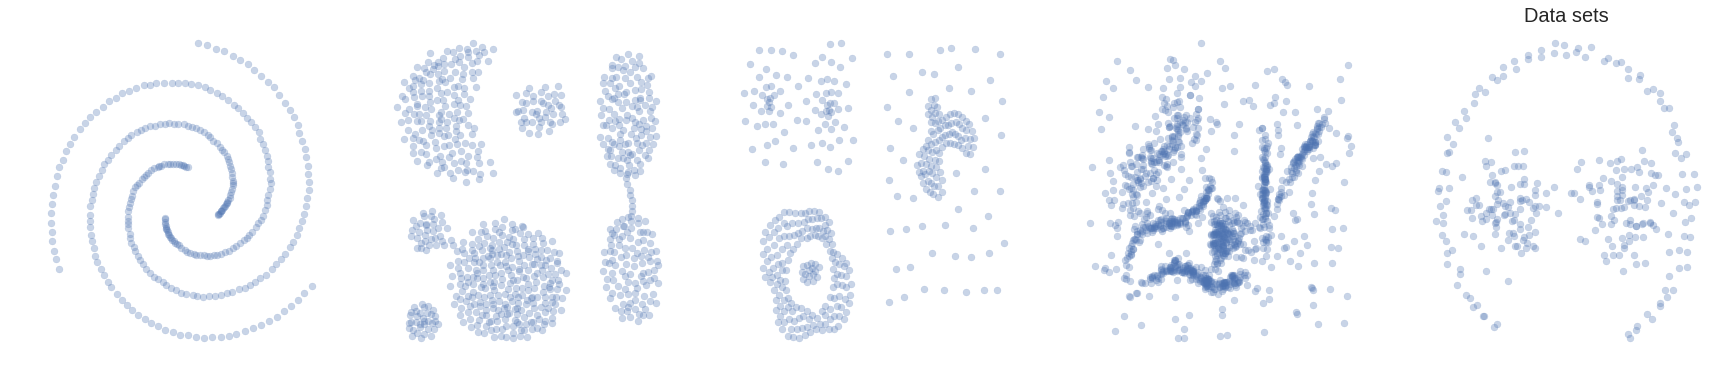

In [34]:
format_table_data(dataset, np.array([3,7,5,6,3]))

Now using the different algorithms on the data sets... still need to specify how (if so) the number of clusters was set and what the maximum number of iterations was. 
Note: some algorithms don't have an iteration count yet and some algorithms don't give cluster centers.

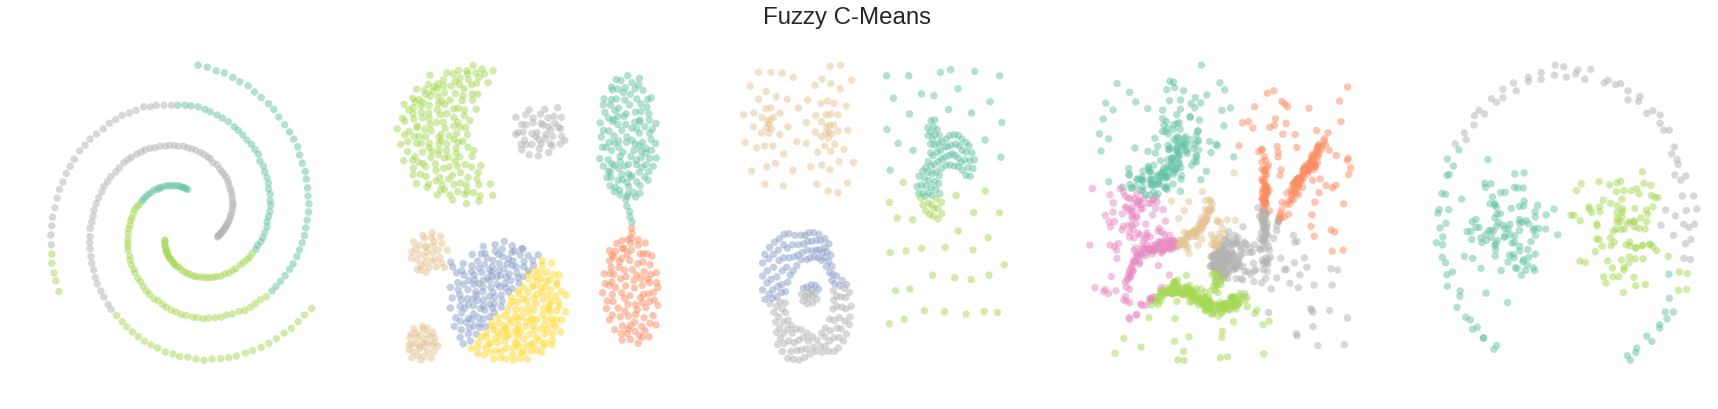

In [48]:
fig,ax, row_labels, column_labels = format_subplots()
clusternumber= [3,7,5,6,3]
results = np.zeros((4,5))
for i in range(5):
    data = dataset[i]
    c=clusternumber[i]
    results[ 2,i] = c
    f = FuzzyCMeans(data,c, verbose = False )
    f.fit()
    labels = f._cluster_labels
    results[ 3,i] = np.mean(f._cluster_dist)
    results[ 0,i] = f._time
    results[ 1,i] = f._iter 
    ax[i].scatter(data[:,0],data[:,1],alpha=.5, c = labels, cmap='Set2')
    ax[i].axis('off')

fig.suptitle('Fuzzy C-Means')
#plt.show()
plt.savefig('images/comparison_fuzzy.png')

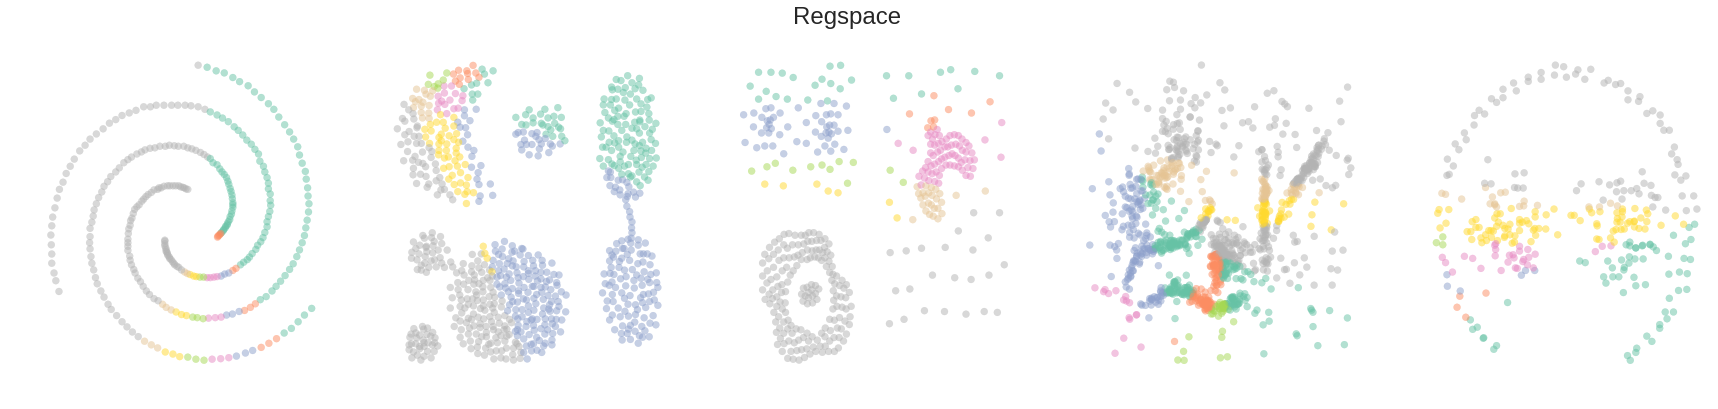

In [51]:
fig,ax, row_labels, column_labels = format_subplots()

for i in range(5):
    data = dataset[i]
    #c=clusternumber[i]
    results[ 2,i] = c
    f = Regspace(data,min_dist = .3,max_centers=10, verbose = False )
    f.fit()
    labels = f._cluster_labels
    
    ax[i].scatter(data[:,0],data[:,1],alpha=.5, c = labels, cmap='Set2')
    ax[i].axis('off')

fig.suptitle('Regspace')
#plt.show()
plt.savefig('images/comparison_regspace.png')

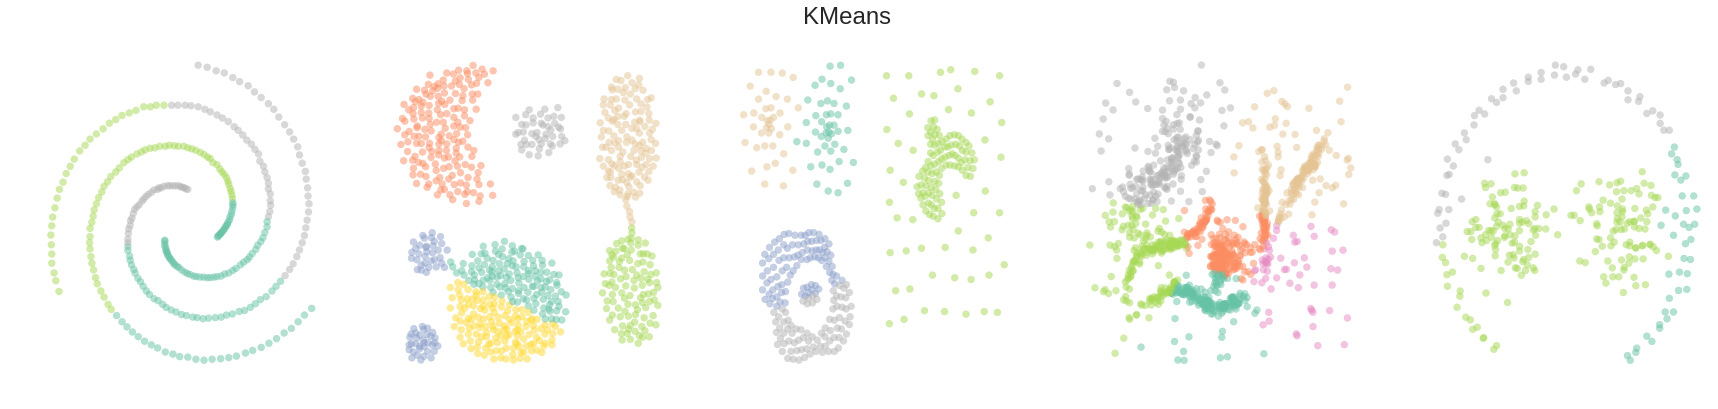

In [53]:
fig,ax, row_labels, column_labels = format_subplots()
clusternumber= [3,7,5,6,3]
results = np.zeros((4,5))
for i in range(5):
    data = dataset[i]
    c=clusternumber[i]
    results[ 2,i] = c
    f = KMeans(data,c,verbose = False )
    f.fit()
    labels = f._cluster_labels
    
    ax[i].scatter(data[:,0],data[:,1],alpha=.5, c = labels, cmap='Set2')
    ax[i].axis('off')

fig.suptitle('KMeans')
#plt.show()
plt.savefig('images/comparison_kmeans.png')

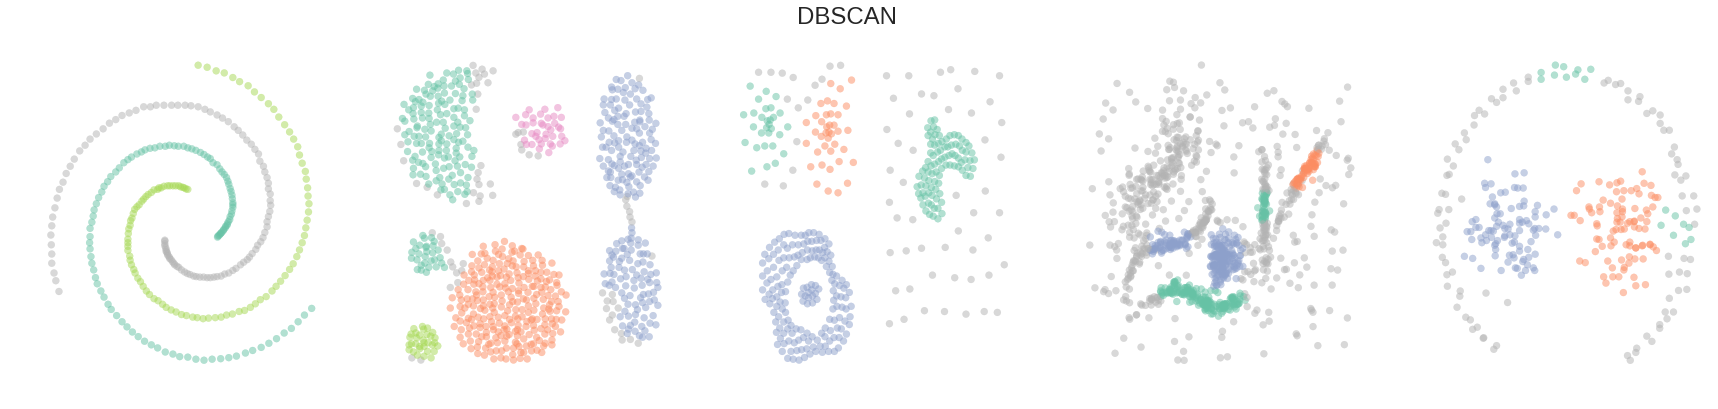

In [118]:
fig,ax, row_labels, column_labels = format_subplots()
eps = [1,.2,.4,.2,.4]
min_pts = [5,15,15,35,10]


for i in range(5):
    data = dataset[i]
    results[ 2,i] = c
    f = DBSCAN(data,eps=eps[i],minPts=min_pts[i],verbose = False )
    f.fit()
    types = np.array([type(x) for x in f.cluster_labels])
    labels = f.cluster_labels
    types = [x for x in labels if type(x)==int]
    labels = [x if type(x)==int else 13 for x in labels]
    
    ax[i].scatter(data[:,0],data[:,1],alpha=.5, c = labels, cmap='Set2')
    ax[i].axis('off')

fig.suptitle('DBSCAN')
#plt.show()
plt.savefig('images/comparison_dbscan.png')

Constructing squared distance matrix
Constructing squared distance matrix
Constructing squared distance matrix
Constructing squared distance matrix
Constructing squared distance matrix


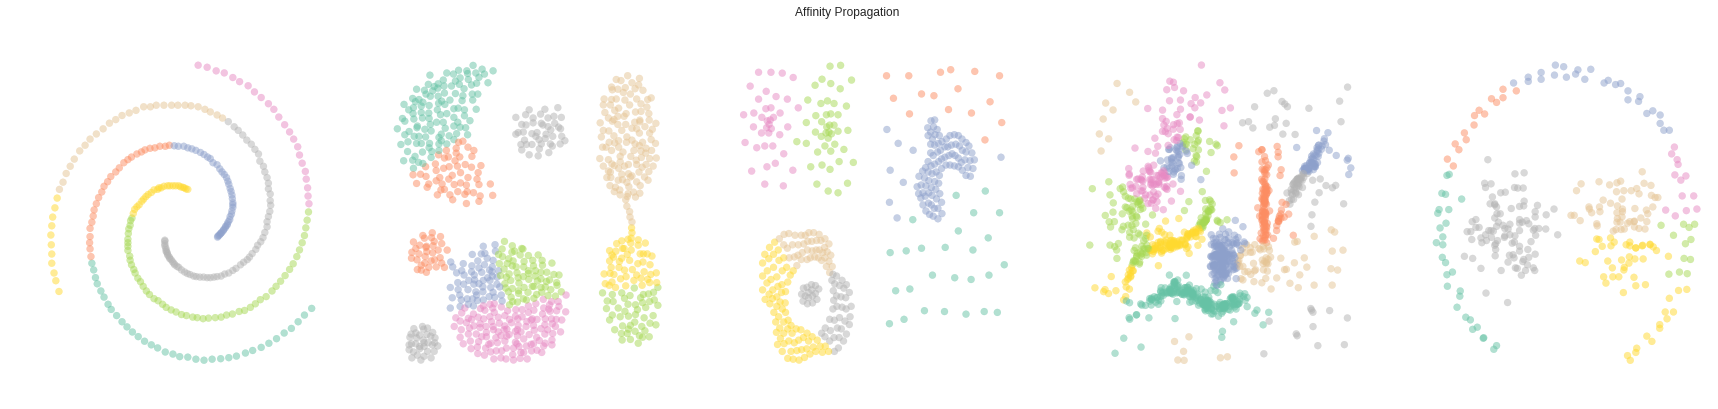

In [144]:
fig,ax, row_labels, column_labels = format_subplots()

sensitivity_weights=['median','min','median','min','median']
damp = [.5,.3,.3,.3,.3]
for i in range(5):
    data = dataset[i]
    c=clusternumber[i]
    results[ 2,i] = c
    f = AffinityPropagation(data,sensitivity_weights='median',damp=.3,verbose = False )
    f.fit()
    labels = f._cluster_labels
    
    ax[i].scatter(data[:,0],data[:,1],alpha=.5, c = labels, cmap='Set2')
    ax[i].axis('off')

fig.suptitle('Affinity Propagation')
#plt.show()
plt.savefig('images/comparison_affprop.png')

/home/mattes/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:620: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)


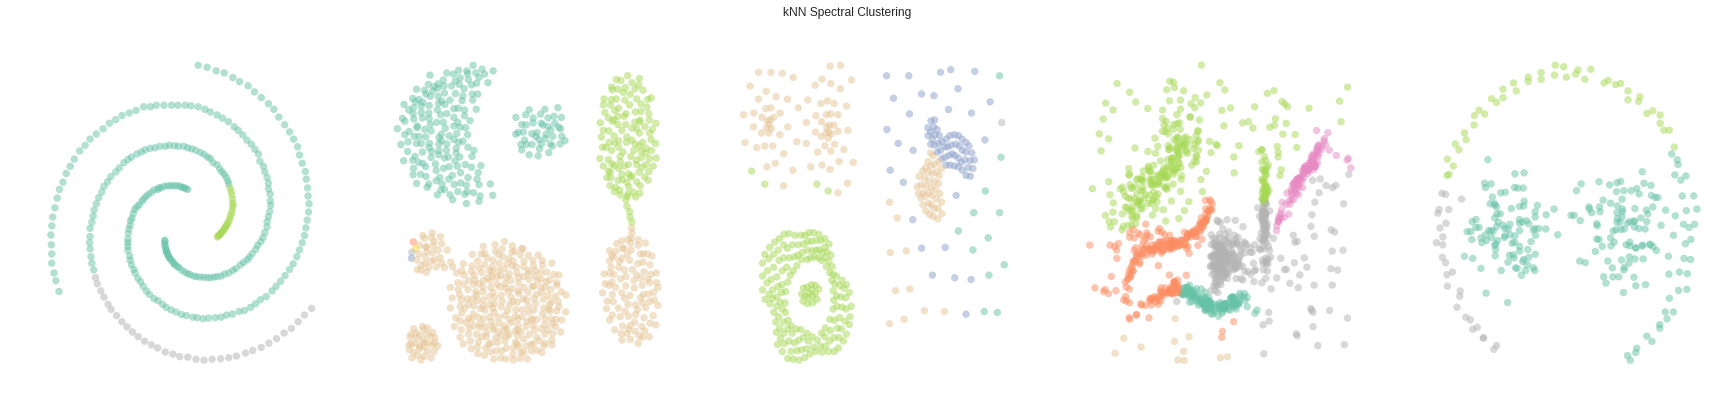

In [146]:
fig,ax, row_labels, column_labels = format_subplots()
clusternumber= [3,7,5,6,3]
k_neighbor=[10,400,300,20,30]

for i in range(5):
    data = dataset[i]
    c=clusternumber[i]
    results[ 2,i] = c
    f = SpectralClustering(data,k=clusternumber[i],verbose = False,similarity_measure='kNN'
                           ,kNN_mode='mutual',k_neighbor=k_neighbor[i],laplacian='standard')
    f.fit()
    labels = f.cluster_labels
    
    ax[i].scatter(data[:,0],data[:,1],alpha=.5, c = labels, cmap='Set2')
    ax[i].axis('off')

fig.suptitle('kNN Spectral Clustering')
#plt.show()
plt.savefig('images/comparison_knnspectral.png')